# Import important files

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Showing matplotlib plots in jupyter notebook
%matplotlib inline

# Notes Before last version

In [39]:
# Using patientId for better intitution

# Read Data

In [122]:
X_full[:,385]

array([ 21.803851,  21.745726,  21.6876  , ...,  27.945721,  14.582997,
        14.498955])

In [123]:
# Getting Training dataset
# Import dataset as Dataframe
df_full = pd.read_csv("../Dataset/slice_localization_data.csv", sep=',')

# Import dataset as numpy array
X_full = np.genfromtxt("../Dataset/slice_localization_data.csv", delimiter=',', skip_header=1)

# Making distnict output column for later uses
y = X_full[:,385]

# Removing first and last column from the dataset
X_train = X_full[:,1:385]

# Converting X_train to Dataframe
df_train = pd.DataFrame(X_train)
df_train.columns = df_full.columns[1:385]

# Getting size of the Training Dataset
m,n = X_train.shape

In [58]:
# Getting shape of the Dataset
X_full.shape

(53500, 386)

In [59]:
# Getting first 10 rows of the numpy array
X_full[0:10]

array([[  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.803851],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.745726],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.6876  ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.396971],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         21.28072 ],
       [  0.      ,   0.      ,   0.      , ...,  -0.25    ,  -0.25    ,
         22.617612]])

In [60]:
# Getting first 10 rows of the dataframe
df_full.head(10)

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348
5,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.953202,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.513223
6,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.000000,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.455097
7,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.867572,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.396971
8,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.930170,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.280720
9,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.990034,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,22.617612


In [61]:
# Getting some intuition of data
df_full.describe()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


In [62]:
# Gettign unqiue values of the "Patient ID"
np.unique(df_full["patientId"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

# Functions Section

# Data analysis

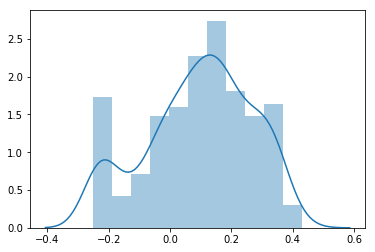

In [69]:
# Plot "Means of each column in dataset( Attributes ) except first and last column"  distplot
sns.distplot(df_train.mean())

# ===> We can conclude all of our attributes are in [-1,1] range, so we don't need to use feature normalize technique

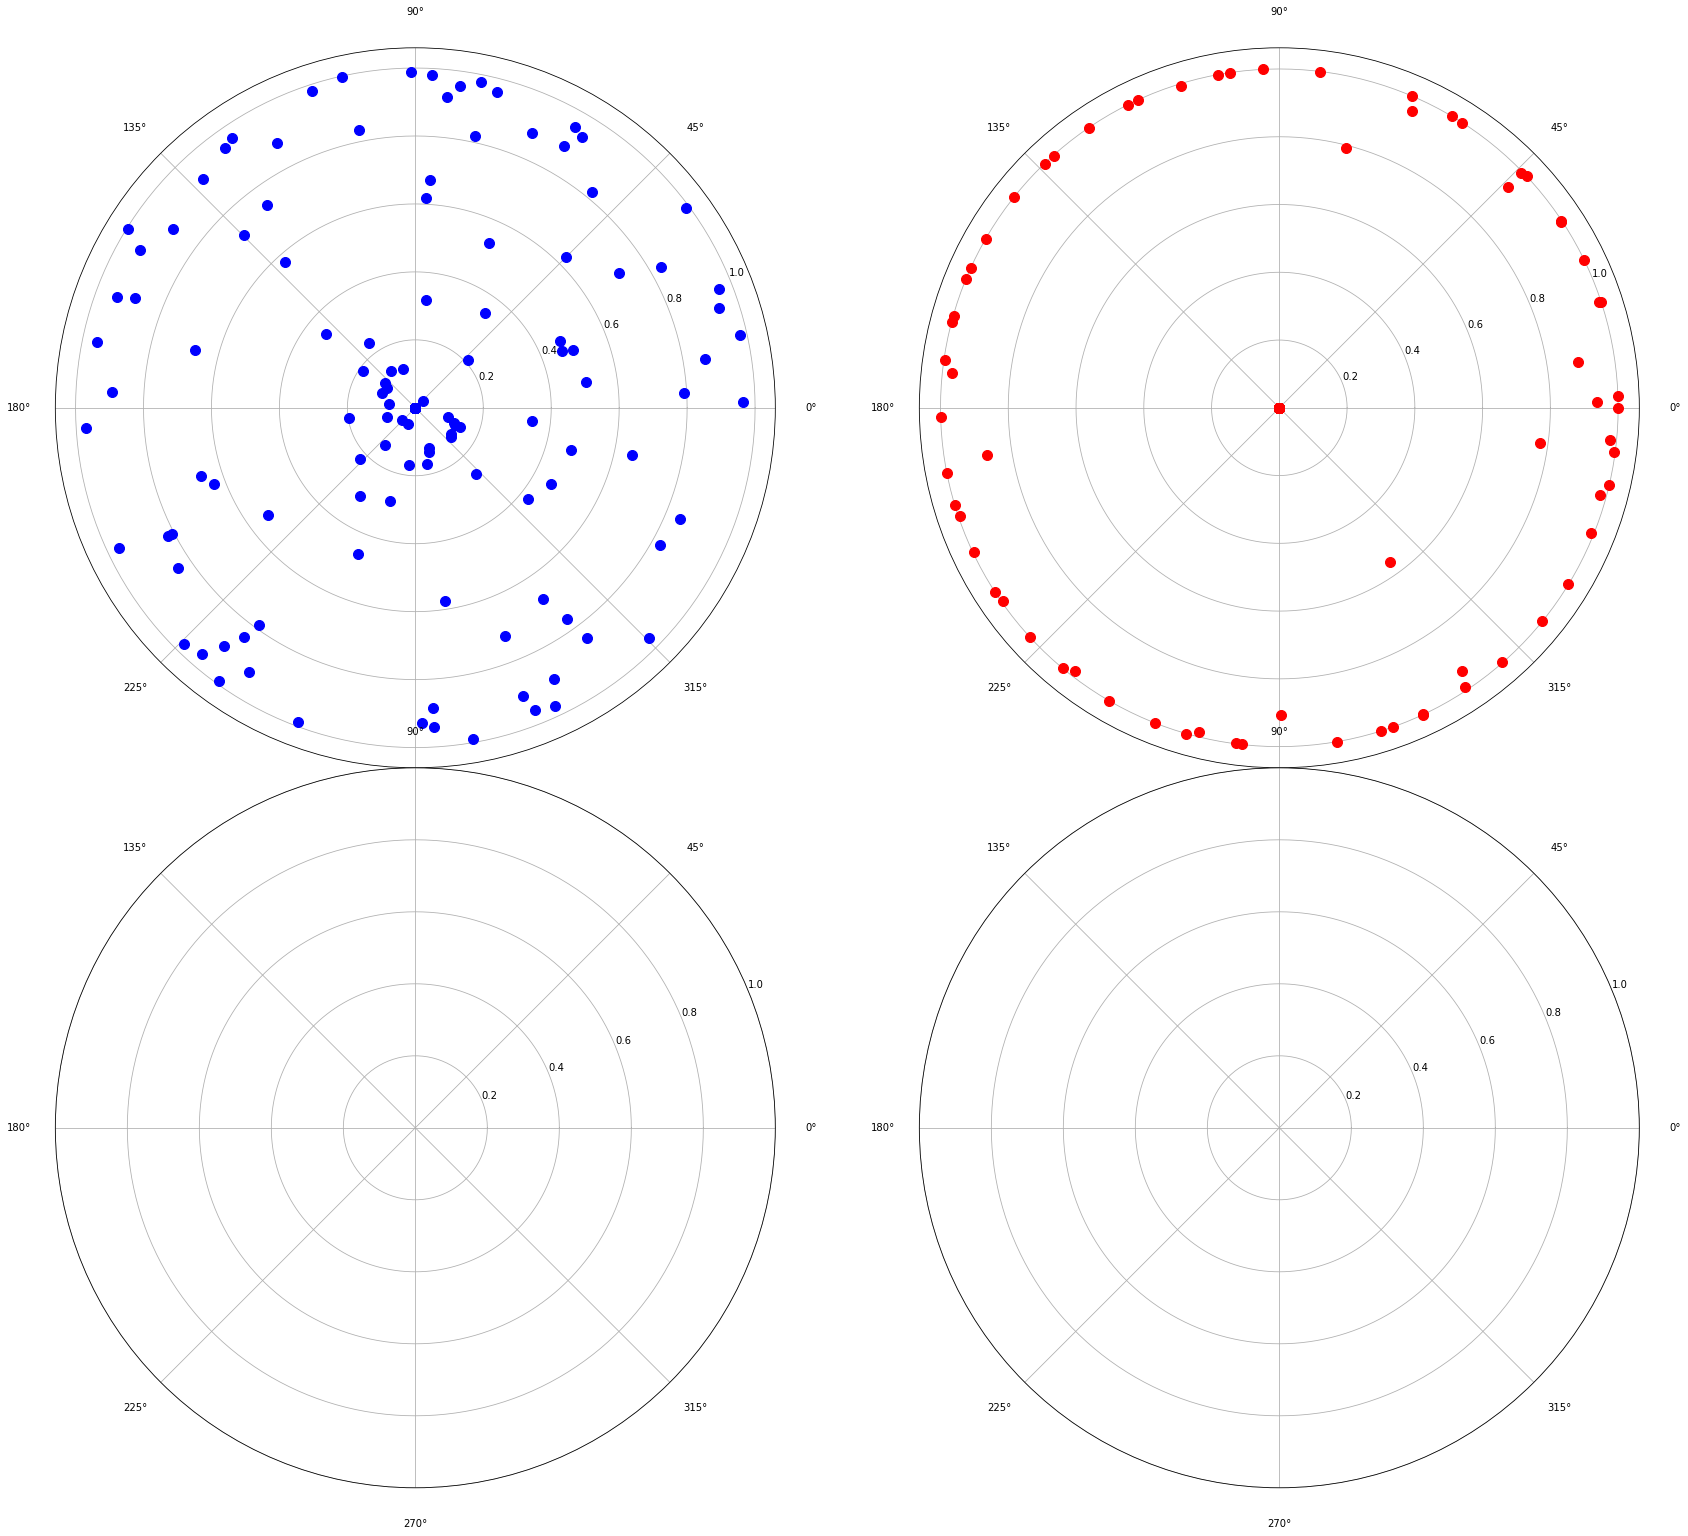

In [208]:
fig = plt.figure(figsize=(12,10))

axes1 = fig.add_axes([0, 2, 1, 1], projection='polar')
axes2 = fig.add_axes([1, 2,1,1], projection='polar')
axes3 = fig.add_axes([0, 1, 1, 1], projection='polar')
axes4 = fig.add_axes([1, 1,1,1], projection='polar')

# Plotting first example of bone structure of the one person
axes1.plot(X_train[150,1:241], 'bo', ms=10)
axes1.set_xlabel("Bone Structure")

# Plotting first example of air inclusion of the one person
axes2.plot(X_train[150,241:386], 'ro', ms=10)
axes2.set_xlabel("Air Inclusion")

# Plotting second example of bone structure of the one person
axes1.plot(X_train[3541,1:241], 'bo', ms=10)
axes1.set_xlabel("Bone Structure")

# Plotting second example of air inclusion of the one person
axes2.plot(X_train[3541,241:386], 'ro', ms=10)
axes2.set_xlabel("Air Inclusion")

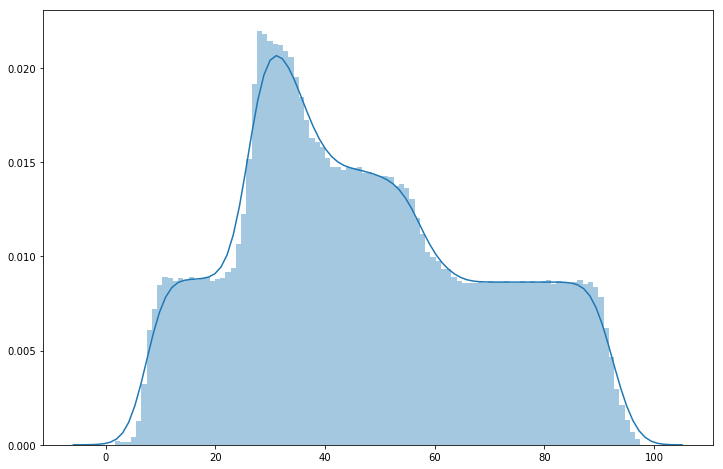

In [206]:
# Plot "Reference" column distplot
plt.figure(figsize=(12,8))
sns.distplot(y, bins=100)

# ==> We can see that we don't have any image for locations of body with value bigger than 100, and majority of the
# images are taken with values in [25,40] range

# Predection Section